# Redes Neuronales


## 1. Perceptrón

Su origen viene en intentos de encontrar representaciones matemáticas de procesado de la información en sistemas biológicos.

Aunque primera implementación data de 1947, realmente fue con la aparición del llamado **perceptrón**, gracias al trabajo de Frank Rosenblatt, en 1956 cuando empezó a coger fama. Incluso la prensa generalista se hizo eco de este hecho: https://www.newyorker.com/magazine/1958/12/06/rival-2:

*Dr. Rosenblatt defined the perceptron as the first non-biological object which will achieve an organization o its external environment in a meaningful way. It interacts with its environment, forming concepts that have not been made ready for it by a human agent[...]It can tell the difference betw. a cat and a dog, although it wouldn't be able to tell whether the dog was to the left or right of the cat.*

Un perceptrón no es más que una regresión lineal con una **función de activación** a la salida.
\\[
y(x)= f\left( \sum w_i · x_i\right)
\\]
Donde la función de activación *f(x)* simplemente saca un 1 si el valor está por encima de un umbral o 0 si está por debajo.

A veces se escribe como:
\\[
y(x)= f\left( bias+\sum w_i · x_i\right)
\\]
Donde $bias$ es una constante que se añade a la función. Ambas fórmulas son equivalentes si una de las columnas de $x_i$ se deja como constante.

Se inspira en como funciona una neurona:
![](img/neurona.png)
Se supone que una determinada combinación de señales en las dentridas puedel lanzar una señal en el axón.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Perceptr%C3%B3n_5_unidades.svg/400px-Perceptr%C3%B3n_5_unidades.svg.png)
El perceptrón es un clasificador binario, sirve para decir si un vector pertenece o no a una clase.

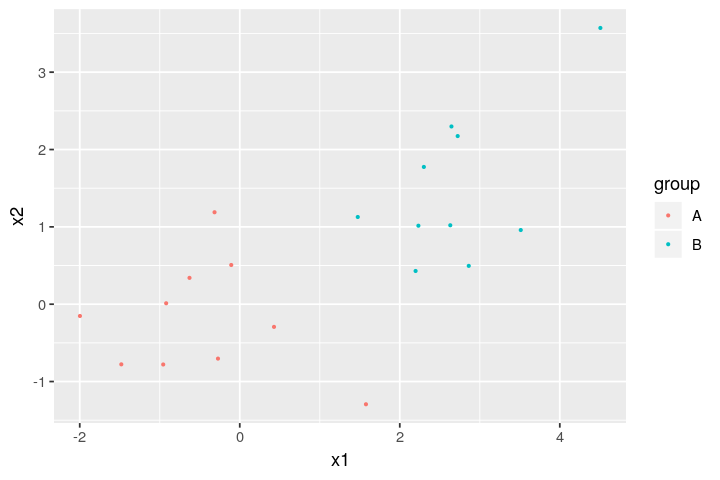

In [1]:
set.seed(12)
Num_samples<-10

dfa<-data.frame(group="A",x1=rnorm(Num_samples,mean=0,sd=1),x2=rnorm(Num_samples,mean=0,sd=1))
dfb<-data.frame(group="B",x1=rnorm(Num_samples,mean=2.5,sd=1),x2=rnorm(Num_samples,mean=1.5,sd=1))
df_train<-rbind(dfa,dfb)
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

ggplot(df_train,aes(x=x1,y=x2,color=group))+geom_point(size=0.5)

In [2]:
perceptron<-function(x, weigths, threshold=0){
    if ((weigths[1]+sum(x*weigths[2:length(weigths)]))>threshold){
        return(1)
    }else{
        return(0)
    }
}

   
     A  B
  0  5  0
  1  5 10

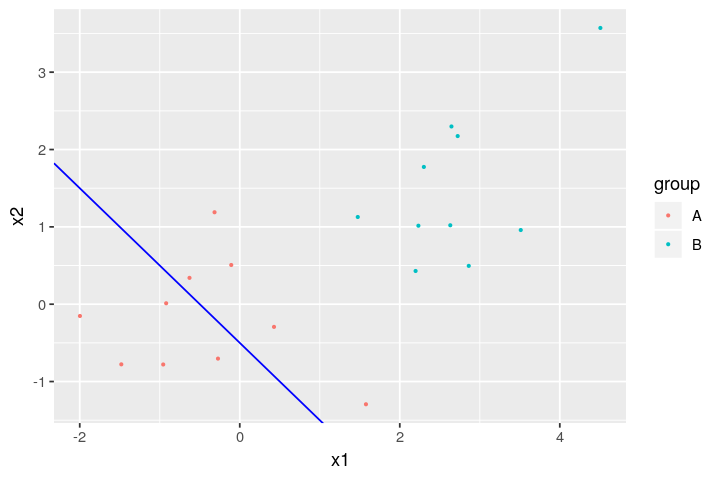

In [3]:
weigths<-c(1,1,1)
threshold<-0.5
pred<-apply(df_train[,2:3],1,function(x) perceptron(x,weigths=weigths,threshold=threshold))
table(factor(pred),df_train$group)

ggplot(df_train,aes(x=x1,y=x2,color=group))+geom_point(size=0.5)+
    geom_abline(slope = -weigths[2]/weigths[3],intercept = (threshold-weigths[1])/weigths[3],color='blue')

In [4]:
threshold <- 0.5
learning_rate <- 0.0002

w<-c(0.5,0,0.005)
i<-0
iter<-0

[1] "Iteracción 229 Dato: 1 Error: 0 Pesos: 0.497,0.00106680915568401,0.00241724135529556"

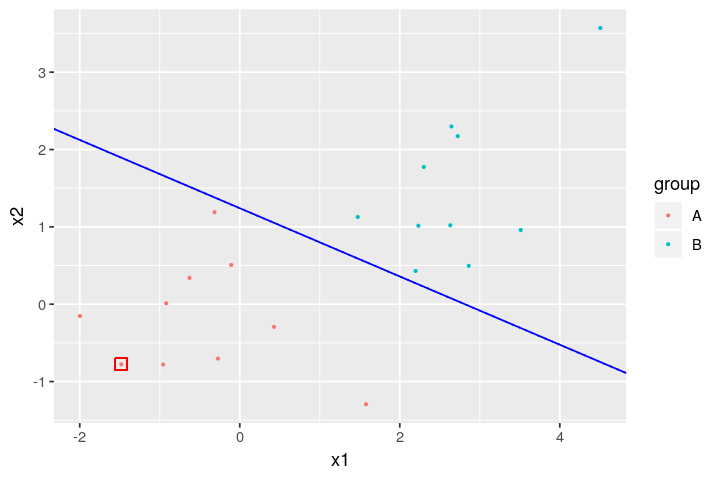

In [233]:
i<-i %% (nrow(df_train)-1)+1
iter<-iter+1
    
x_vector <- df_train[i,c(2:3)]
y_out<-perceptron(x_vector,weigths = w,threshold=threshold)

error=as.numeric(df_train[i,"group"]=="B")-y_out
pre_w<-w
if (error!=0){    
    w[1]<-w[1]+error*learning_rate
    for (idx in 1:length(x_vector)){
        w[idx+1]<-w[idx+1]+x_vector[1,idx]*error*learning_rate        
    }
}
paste("Iteracción",iter,"Dato:",i,"Error:",error,"Pesos:",paste(w,collapse=","))
ggplot(df_train,aes(x=x1,y=x2,color=group))+geom_point(size=0.5)+
    geom_point(size=3,x=x_vector[1,1],y=x_vector[1,2],shape=0,color="red")+
    geom_abline(slope = -pre_w[2]/pre_w[3],intercept = (threshold-pre_w[1])/pre_w[3],color='blue',linetype=3)+
    geom_abline(slope = -w[2]/w[3],intercept = (threshold-w[1])/w[3],color='blue')

Este algoritmo era muy sencillo computancionalmente y se puede conseguir grandes logros. Por ejemplo podemos reconocer caracteres numéricos escritos a mano.

In [234]:
library("dslabs")
mnist_data<-read_mnist()


In [235]:
str(mnist_data)

List of 2
 $ train:List of 2
  ..$ images: int [1:60000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ labels: int [1:60000] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ images: int [1:10000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ labels: int [1:10000] 7 2 1 0 4 1 4 9 5 9 ...


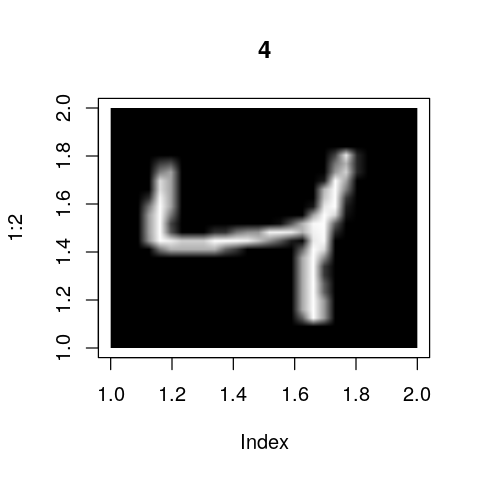

In [236]:
plot_row_image<-function(image_list,index){    
    row<-image_list$images[index,]
    label<-image_list$labels[index]
    img<-matrix(row/255,ncol = sqrt(length(row)))
    img<-t(apply(img,2,rev))
    img<-t(apply(img,1,rev))
    plot(1:2, type='n',main=label)
    rasterImage(img, 1, 1, 2,2)
}
options(repr.plot.height=4,repr.plot.width=4)

plot_row_image(mnist_data$train,3)

Vamos a hacer un clasificador que nos diga si un número es un 0 o no.

In [237]:
threshold <- 0.5
learning_rate <- 0.0002

num_pixel<-length(mnist_data$train$images[1,])

#Incializamos los pesos a un valor aleatorio y cercano a 0
w<-unlist(rnorm(num_pixel+1,mean=0,sd=0.1))
i<-0
iter<-0
error_list<-c()
epoch<-0

In [238]:
max_epocs<-40
pixels_value<-mnist_data$train$images
labels_out<-as.numeric(mnist_data$train$label==0)

repeat{
    num_errors<-0    
    epoch<-epoch+1
    for (i in 1:nrow(pixels_value)){
        iter<-iter+1

        x_vector <- pixels_value[i,]
        y_out<-perceptron(x_vector,weigths = w,threshold=threshold)

        error=labels_out[i]-y_out        
        if (error!=0){    
            w[1]<-w[1]+error*learning_rate
            for (idx in 1:length(x_vector)){
                w[idx+1]<-w[idx+1]+x_vector[idx]*error*learning_rate        
            }
            num_errors<-num_errors+abs(error)
        }
    }
    error_list<-c(error_list,num_errors)
    if(epoch>max_epocs || num_errors==0){
        break
    }
}

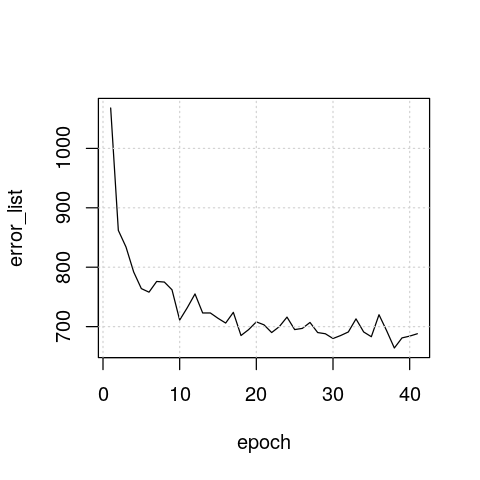

In [239]:
plot(error_list,xlab="epoch",t="l")
grid()

In [240]:
test_images<-mnist_data$test$images
test_label_real<-as.numeric(mnist_data$test$label==0)

y_out<-apply(test_images,1,function(x) perceptron(x,weigths = w))
library(caret)
confusionMatrix(table(y_out,test_label_real),positive = "1")

Loading required package: lattice



Confusion Matrix and Statistics

     test_label_real
y_out    0    1
    0 9000   86
    1   20  894
                                          
               Accuracy : 0.9894          
                 95% CI : (0.9872, 0.9913)
    No Information Rate : 0.902           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9382          
                                          
 Mcnemar's Test P-Value : 2.73e-10        
                                          
            Sensitivity : 0.9122          
            Specificity : 0.9978          
         Pos Pred Value : 0.9781          
         Neg Pred Value : 0.9905          
             Prevalence : 0.0980          
         Detection Rate : 0.0894          
   Detection Prevalence : 0.0914          
      Balanced Accuracy : 0.9550          
                                          
       'Positive' Class : 1               
                                      

![](https://i.pinimg.com/236x/82/83/ec/8283ecb4ec4996e262f303de186a6786--robby-the-robot-mr-robot.jpg)

Todo era felicidad, alegría, risas y optimismo hasta que en 1969 Marvin Minsky y Seymour A. Papert publicaron el siguiente libro:

https://mitpress.mit.edu/books/perceptrons

![](https://images-na.ssl-images-amazon.com/images/I/51Ok0iTK1ML._SX329_BO1,204,203,200_.jpg)

El perceptron tiene un problema y es que solo puede clasificar grupos linealmente separables. Demostraron que el perceptrón no es capaz de converger en el simple problema XOR.

<table>
<tr><td style="padding:0 35px;">
    
| A | B | XOR |
|-|-|-| 
| 0 | 0 | 0 |      
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

</td><td style="padding:0 35px;">
    
| A | B | OR |
|-|-|-| 
| 0 | 0 | 0 |      
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

</td><td style="padding:0 35px;">
    
| A | B | AND |
|-|-|-| 
| 0 | 0 | 0 |      
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

</td>
</tr> </table>

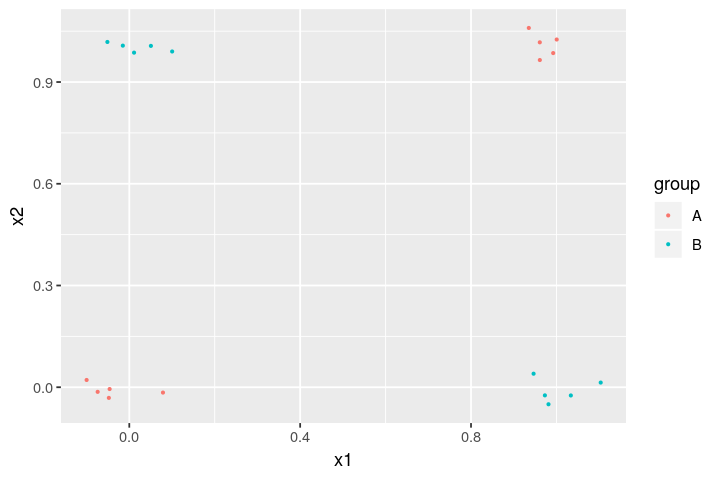

In [241]:
set.seed(12)
Num_samples<-5
sdev<-0.05
dfa1<-data.frame(group="A",x1=rnorm(Num_samples,mean=0,sd=sdev),x2=rnorm(Num_samples,mean=0,sd=sdev))
dfa2<-data.frame(group="A",x1=rnorm(Num_samples,mean=1,sd=sdev),x2=rnorm(Num_samples,mean=1,sd=sdev))
dfb1<-data.frame(group="B",x1=rnorm(Num_samples,mean=0,sd=sdev),x2=rnorm(Num_samples,mean=1,sd=sdev))
dfb2<-data.frame(group="B",x1=rnorm(Num_samples,mean=1,sd=sdev),x2=rnorm(Num_samples,mean=0,sd=sdev))

df_train<-rbind(dfa1,dfb1,dfa2,dfb2)
#df_train<-df_train[sample(nrow(df_train)),]
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

ggplot(df_train,aes(x=x1,y=x2,color=group))+geom_point(size=0.5)

In [242]:
threshold <- 0.5
learning_rate <- 0.002

w<-c(0.5,0,0.005)
i<-0
iter<-0

[1] "Iteracción 17 Dato: 17 Error: 1 Pesos: 0.5,0.00255213786110298,0.00300650922759637"


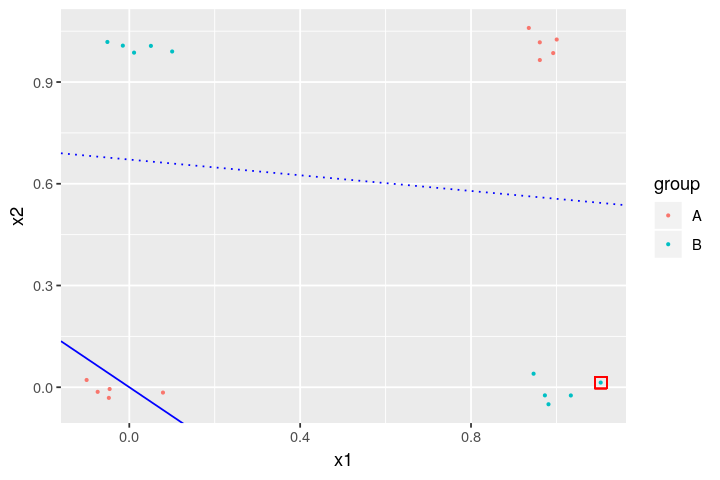

In [259]:
i<-i %% (nrow(df_train)-1)+1
iter<-iter+1
    
x_vector <- df_train[i,c(2:3)]
y_out<-perceptron(x_vector,weigths = w, threshold=threshold)

error=as.numeric(df_train[i,"group"]=="B")-y_out
pre_w<-w
if (error!=0){    
    w[1]<-w[1]+error*learning_rate
    for (idx in 1:length(x_vector)){
        w[idx+1]<-w[idx+1]+x_vector[1,idx]*error*learning_rate        
    }
}
print(paste("Iteracción",iter,"Dato:",i,"Error:",error,"Pesos:",paste(w,collapse=",")))
ggplot(df_train,aes(x=x1,y=x2,color=group))+geom_point(size=0.5)+
    geom_point(size=3,x=x_vector[1,1],y=x_vector[1,2],shape=0,color="red")+
    geom_abline(slope = -pre_w[2]/pre_w[3],intercept = (threshold-pre_w[1])/pre_w[3],color='blue',linetype=3)+
    geom_abline(slope = -w[2]/w[3],intercept = (threshold-w[1])/w[3],color='blue')


# WINTER IS COMING

La inteligencia artificial cae en popularidad, llega lo que se conoce como el invierto de la inteligencia artificial: https://en.wikipedia.org/wiki/AI_winter

![](#img/decepcion.jpeg)

## 2. Perceptrón multicapa

Para solucionar este tipo de problemas inventaron el perceptron multicapa que consiste en que la salida de un perceptrón sea la entrada de otro.

![](img/xor.png)

In [260]:
x=c(0,0)
h1=perceptron(x,c(0,1,0))
h2=perceptron(x,c(-1,1,1))
h3=perceptron(x,c(0,0,1))
c(h1,h2,h3)
perceptron(c(h1,h2,h3),c(0,1,-2,1))

[1] 0 0 0

[1] 0

Ahora solo tenemos que crear una función nueva y entrenarla como habíamos hecho hasta ahora:

In [261]:
multilayer_perceptron<-function(x,weigths){
    h1=perceptron(x,w[c(1,2,3)])
    h2=perceptron(x,w[c(4,5,6)])
    h3=perceptron(x,w[c(7,8,9)])
    perceptron(c(h1,h2,h3),w[c(10,11,12,13)])
}
x=c(1,0)
w<-c(0,1,0,-1,1,1,0,0,1,0,1,-2,1)
multilayer_perceptron(x,w)

[1] 1

In [262]:
learning_rate <- 0.02

w<-rnorm(13,mean=0,sd=0.001)
i<-0
iter<-0
errors<-c()

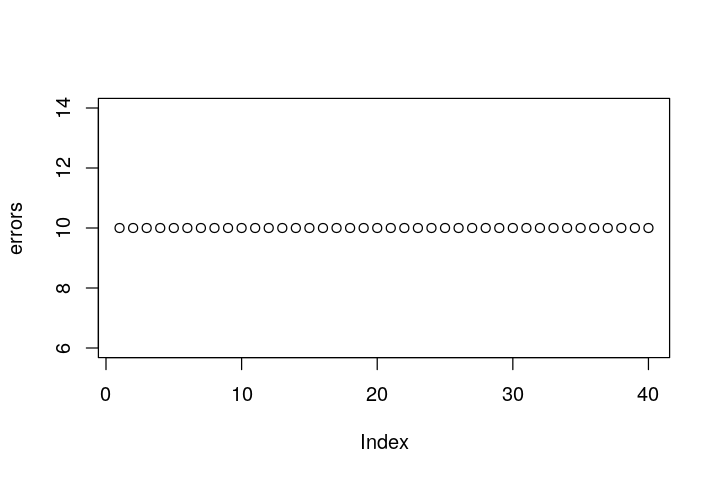

In [263]:
threshold <- 0

for (epoch in 1:40){
    error_i<-0
    for (i in 1:nrow(df_train)){    

        x_vector <- df_train[i,c(2:3)]
        y_out<-multilayer_perceptron(x_vector,weigths = w)

        error=as.numeric(df_train[i,"group"]=="B")-y_out
        if (error!=0){    
            w[1]<-w[1]+error*learning_rate
            for (idx in 1:length(x_vector)){
                w[idx+1]<-w[idx+1]+x_vector[1,idx]*error*learning_rate        
            }
            #print(paste("Dato:",i,"Pesos:",paste(w,collapse=",")))

        }        
        error_i<-error_i+error
    }
    
    errors<-c(errors,error_i)
}
plot(errors)

El algoritmo no converge, no podemos entrenar un perceptron para calcular los pesos.
 


Pero, ¿cómo se entrenan los pesos? El algoritmo que hemos visto ahora no sirve para perceptrones multicapa.


## 3. Backpropagation 

La solución llegó en 1986, el algoritmo backpropagation es capaz de calcular los pesos de una red neuronal de varias capas mirando como se propagan los errores.

Se empiezan a usar dos nuevas funciones de activación:
* sigmoide: $f(x)=\frac{1}{1+e^{-x}}=\frac{e^x}{1+e^x}$

* tanh: $f(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$

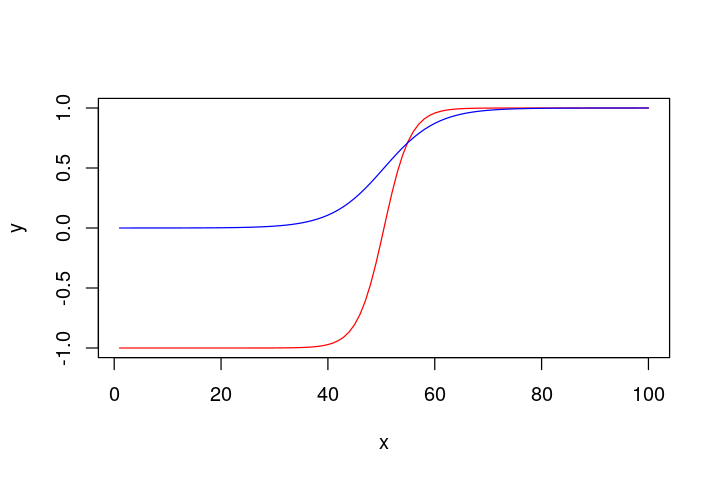

In [264]:
x<-seq(-10,10,length.out = 100)

plot(tanh(x),ylab='y',xlab='x',t='l',col='red')
lines(1/(1+exp(-x)),ylab='y',xlab='x',t='l',col='blue')

La estructura de una red neuronal prealimentada (feed-fordward neural network) es la siguiente:

![](img/NN.png)

En estas redes se define una función error objetivo que hay que minimizar. Una común puede ser el error cuadrático medio que ya vimos en regresiones lineales, pero hay muchas otras en función del tipo de problema que se trate de atacar.

El algoritmo de backpropagation se basa en la regla de la cadena a la hora de ir diferenciando como varía el error, *propaga* el error desde la salida hacia atrás hasta llegar a la entrada pasando por todas las capas ocultas. Este algoritmo se basa en la regla de la cadena:

\\[
\frac{dz}{dx}=\frac{dz}{dy}\frac{dy}{dz}
\\]

In [265]:
library("dslabs")
mnist_data<-read_mnist()
str(mnist_data)

List of 2
 $ train:List of 2
  ..$ images: int [1:60000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ labels: int [1:60000] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ images: int [1:10000, 1:784] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ labels: int [1:10000] 7 2 1 0 4 1 4 9 5 9 ...


In [266]:
df_train<-cbind(data.frame(digit0=mnist_data$train$labels==0),as.data.frame(mnist_data$train$images))
head(df_train)

,digit0,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
,<lgl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,FALSE,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,TRUE,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,FALSE,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,FALSE,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,FALSE,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,FALSE,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [267]:
library(neuralnet)
set.seed(1)
nn=neuralnet(digit0~., data=df_train, hidden=4,act.fct = "logistic",linear.output = FALSE)

In [268]:
pred=compute(nn,as.data.frame(mnist_data$test$images))

In [269]:
df_result<-data.frame(pred=pred$net.result,real=mnist_data$test$label==0)
library(caret)
caret::confusionMatrix(table(df_result$pred>0.4,df_result$real))

Confusion Matrix and Statistics

       
        FALSE TRUE
  FALSE  8933   62
  TRUE     87  918
                                          
               Accuracy : 0.9851          
                 95% CI : (0.9825, 0.9874)
    No Information Rate : 0.902           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9167          
                                          
 Mcnemar's Test P-Value : 0.04928         
                                          
            Sensitivity : 0.9904          
            Specificity : 0.9367          
         Pos Pred Value : 0.9931          
         Neg Pred Value : 0.9134          
             Prevalence : 0.9020          
         Detection Rate : 0.8933          
   Detection Prevalence : 0.8995          
      Balanced Accuracy : 0.9635          
                                          
       'Positive' Class : FALSE           
                                          

Las redes neuronales se convierten en la **segunda mejor** forma de afrontar este tipo de problemas.

# 4. Deeplearning

En 2006 científicos con mejor idea de como vender su trabajo empiezan a acuñar el termino deeplearning para referirse a redes neuronales con múltiples capas.

Desde entonces han aparecido bastantes nuevos avances:
* Mayor capacidad de cómputo: CPUs multicore, GPUs
* Big Data: Muchos más datos para entrenar
* Nuevos tipos de capas de neuronas:
 * Convolucionales
 * Memoria (LSTM, GRU)
* Nuevas funciones de activación:
 * ReLU
 * Leaky ReLU
 * Softmax
* Nuevos paradigmas de redes neuronales:
 * Reinforcement Learning
 * Generative Adversarian Networks

https://www.asimovinstitute.org/neural-network-zoo/
![](https://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZo19High.png)

Más sobre deeplearning:
https://beamandrew.github.io/deeplearning/2017/02/23/deep_learning_101_part1.html

# Usos de Redes Neuronales

Se pueden usar para resolver problemas de:
* Clasificación: Imágenes, datos
* Regresión
* Predicción de series temporables
* Generación de imágenes: mediante GAN
* Aprendizaje semisupervisado: pueden aprender a resolver problemas complejos como por ejemplo jugar a videojuegos o ganar al Go.
